In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import numpy as np 
import scipy.stats as stats
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

%matplotlib inline

In [2]:
df=pd.read_excel("EastWestAirlines.xlsx")

In [3]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
df.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [5]:
df.shape

(3999, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [7]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [8]:
df1=df.drop(['ID#'],axis=1)

In [9]:
df1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [12]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return(x)

In [13]:
df_norm = norm_func(df1.iloc[:])

In [14]:
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


#### Conducting hirarical clustering

In [15]:
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot as plt

In [16]:
from sklearn.cluster import AgglomerativeClustering
hclusters=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='single')
hclusters

AgglomerativeClustering(linkage='single', n_clusters=5)

In [17]:
AgglomerativeClustering=hclusters.fit_predict(df_norm)
AgglomerativeClustering

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [19]:
cluster_data=pd.DataFrame(AgglomerativeClustering,columns=['clusters'])
cluster_data

,clusters
0,0
1,0
2,0
3,0
4,1
...,...
3994,1
3995,1
3996,1
3997,0


In [20]:
df_norm['clusters']=cluster_data
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0,1
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0,1
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0,1
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0,0


In [21]:
df_norm[df_norm['clusters']==0]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
0,0.016508,0.0,0.0,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,0
1,0.011288,0.0,0.0,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,0
2,0.024257,0.0,0.0,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,0
3,0.008667,0.0,0.0,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,0
5,0.009631,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.836749,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3991,0.022959,0.0,0.5,0.0,0.0,0.056814,0.325581,0.000000,0.000000,0.169520,0.0,0
3992,0.006558,0.0,0.0,0.0,0.0,0.003523,0.139535,0.000000,0.000000,0.169400,0.0,0
3993,0.002331,0.0,0.0,0.0,0.0,0.001384,0.034884,0.000000,0.000000,0.168194,0.0,0
3997,0.032202,0.0,0.0,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0,0


### In the clustering 0 there are 2518 rows are grouped as 0 cluster

In [22]:
df_norm[df_norm['clusters']==1]http://localhost:8888/notebooks/assignment%20on%20clustering1.ipynb#In-the-clustering-0-there-are-2518-rows-are-grouped-as-0-cluster

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,1
7,0.012233,0.0,0.00,0.0,0.0,0.019910,0.046512,0.008112,0.018868,0.836267,1.0,1
8,0.259850,0.0,0.50,0.5,0.0,0.006648,0.500000,0.124931,0.226415,0.837473,1.0,1
9,0.061507,0.0,0.50,0.0,0.0,0.107803,0.325581,0.037317,0.056604,0.835423,1.0,1
11,0.056617,0.0,1.00,0.0,0.0,0.231735,0.220930,0.000000,0.000000,0.834579,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3987,0.006999,0.0,0.00,0.0,0.0,0.000944,0.034884,0.002564,0.018868,0.170002,1.0,1
3989,0.001538,0.0,0.00,0.0,0.0,0.006163,0.069767,0.000000,0.000000,0.169038,1.0,1
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0,1
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0,1


### In the cluster 1 there 1478 cluster are segregated as 1 cluster

In [23]:
df_norm[df_norm['clusters']==2]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
3583,0.093917,0.044851,0.0,0.0,0.0,0.272879,1.0,1.0,1.0,0.1653,1.0,2


#### there is only one data point which is on cluster 2

In [25]:
df_norm[df_norm['clusters']==3]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
2840,0.005019,0.0,0.0,0.0,0.0,0.76084,0.05814,0.020184,0.056604,0.235471,1.0,3


#### there is only one data point which is on cluster 3

In [26]:
df_norm[df_norm['clusters']==4]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
904,0.009288,0.0,0.25,0.0,1.0,0.425398,0.186047,0.0,0.0,0.702074,1.0,4


#### there is only one data point which is on cluster 4

In [27]:
df_norm[df_norm['clusters']==5]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters


#### there are no data points which is on cluster 5

### checking clustering performance with dendrogram

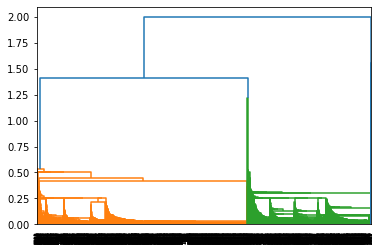

In [28]:
dendrogram=sch.dendrogram(sch.linkage(df_norm,method='single'))

#### performonig k-means clustering

In [29]:
df_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,1


In [30]:
del df_norm['clusters']

In [31]:
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


In [32]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [34]:
wcss=[]

for i in range(1,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)

In [35]:
wcss

[1830.7932128584155,
 823.6756984125224,
 625.1684881570746,
 436.70885761932635,
 348.9433217254146,
 315.3626492564102,
 287.72813241967737,
 263.21909732182104,
 243.91664703659117]

### finding elbow method 

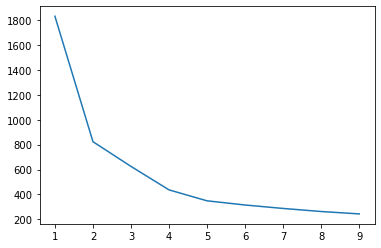

In [36]:
plt.plot(range(1,10),wcss)
plt.show()

In [37]:
x=KMeans(n_clusters=4,max_iter=500,algorithm='auto')
x.fit(df_norm)

KMeans(max_iter=500, n_clusters=4)

In [38]:
k_cluster=x.fit_predict(df_norm)
k_cluster

array([3, 3, 3, ..., 2, 3, 3])

In [39]:
df_norm['k_clusters']=k_cluster
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,k_clusters
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,3
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,3
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,3
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,3
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0,0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0,0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0,2
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0,3


In [40]:
df_norm[df_norm['k_clusters']==0]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,k_clusters
7,0.012233,0.000000,0.00,0.0,0.0,0.019910,0.046512,0.008112,0.018868,0.836267,1.0,0
17,0.008187,0.000000,0.00,0.0,0.0,0.016273,0.058140,0.000000,0.000000,0.832288,1.0,0
21,0.108914,0.181557,0.00,0.0,0.0,0.050439,0.186047,0.058409,0.169811,0.831203,1.0,0
29,0.011274,0.000000,0.00,0.0,0.0,0.017654,0.093023,0.016225,0.018868,0.951772,1.0,0
36,0.013604,0.000000,0.00,0.0,0.0,0.002465,0.046512,0.017847,0.056604,0.947552,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3978,0.005907,0.000000,0.25,0.0,0.0,0.105053,0.186047,0.000000,0.000000,0.171088,1.0,0
3987,0.006999,0.000000,0.00,0.0,0.0,0.000944,0.034884,0.002564,0.018868,0.170002,1.0,0
3989,0.001538,0.000000,0.00,0.0,0.0,0.006163,0.069767,0.000000,0.000000,0.169038,1.0,0
3994,0.010837,0.000000,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0,0


In [41]:
df_norm[df_norm['k_clusters']==1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,k_clusters
6,0.049808,0.0,0.50,0.0,0.0,0.104223,0.290698,0.0,0.0,0.843019,0.0,1
30,0.104365,0.0,0.50,0.0,0.0,0.078871,0.151163,0.0,0.0,0.950567,0.0,1
32,0.162227,0.0,0.75,0.0,0.0,0.159448,0.267442,0.0,0.0,0.948879,0.0,1
44,0.071127,0.0,0.50,0.0,0.0,0.070133,0.209302,0.0,0.0,0.941162,0.0,1
56,0.044562,0.0,0.75,0.0,0.0,0.130227,0.162791,0.0,0.0,0.827948,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3966,0.053732,0.0,0.75,0.0,0.0,0.143505,0.209302,0.0,0.0,0.173861,0.0,1
3974,0.034248,0.0,0.50,0.0,0.0,0.055297,0.453488,0.0,0.0,0.172776,0.0,1
3980,0.016932,0.0,0.50,0.0,0.0,0.072697,0.325581,0.0,0.0,0.171570,0.0,1
3985,0.034617,0.0,0.75,0.0,0.0,0.131771,0.290698,0.0,0.0,0.170726,0.0,1


In [42]:
df_norm[df_norm['k_clusters']==2]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,k_clusters
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,2
8,0.259850,0.0,0.50,0.5,0.0,0.006648,0.500000,0.124931,0.226415,0.837473,1.0,2
9,0.061507,0.0,0.50,0.0,0.0,0.107803,0.325581,0.037317,0.056604,0.835423,1.0,2
11,0.056617,0.0,1.00,0.0,0.0,0.231735,0.220930,0.000000,0.000000,0.834579,1.0,2
15,0.016714,0.0,0.75,0.0,0.0,0.187504,0.174419,0.000000,0.000000,0.833132,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3931,0.029046,0.0,0.50,0.0,0.0,0.097700,0.209302,0.000000,0.000000,0.183265,1.0,2
3954,0.019927,0.0,0.50,0.0,0.0,0.079750,0.337209,0.000000,0.000000,0.176634,1.0,2
3973,0.042407,0.0,0.50,0.0,0.0,0.061592,0.186047,0.000000,0.000000,0.191102,1.0,2
3979,0.033899,0.0,0.50,0.0,0.0,0.079485,0.174419,0.038875,0.056604,0.171449,1.0,2


In [43]:
df_norm[df_norm['k_clusters']==3]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,k_clusters
0,0.016508,0.0,0.0,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,3
1,0.011288,0.0,0.0,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,3
2,0.024257,0.0,0.0,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,3
3,0.008667,0.0,0.0,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,3
5,0.009631,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.836749,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3990,0.006634,0.0,0.0,0.0,0.0,0.019042,0.023256,0.000000,0.000000,0.169641,0.0,3
3992,0.006558,0.0,0.0,0.0,0.0,0.003523,0.139535,0.000000,0.000000,0.169400,0.0,3
3993,0.002331,0.0,0.0,0.0,0.0,0.001384,0.034884,0.000000,0.000000,0.168194,0.0,3
3997,0.032202,0.0,0.0,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0,3


In [45]:
df_norm[df_norm['k_clusters']==4]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,k_clusters


#### DBSCAN clustering

In [46]:
df_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,k_clusters
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,3
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,3
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,3
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,3
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,2


In [47]:
del df_norm['k_clusters']

In [48]:
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


In [49]:
from sklearn.cluster import DBSCAN

In [52]:
dbs=DBSCAN(min_samples=2,eps=0.2)

In [53]:
dbs_clusters=dbs.fit_predict(df_norm)
dbs_clusters

array([0, 0, 0, ..., 4, 0, 0], dtype=int64)

In [54]:
df_norm['dbs_clusters']=dbs_clusters

In [55]:
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,dbs_clusters
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0,3
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0,3
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0,4
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0,0


In [56]:
df_norm[df_norm['dbs_clusters']==0]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,dbs_clusters
0,0.016508,0.0,0.0,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,0
1,0.011288,0.0,0.0,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,0
2,0.024257,0.0,0.0,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,0
3,0.008667,0.0,0.0,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,0
5,0.009631,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.836749,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3990,0.006634,0.0,0.0,0.0,0.0,0.019042,0.023256,0.000000,0.000000,0.169641,0.0,0
3992,0.006558,0.0,0.0,0.0,0.0,0.003523,0.139535,0.000000,0.000000,0.169400,0.0,0
3993,0.002331,0.0,0.0,0.0,0.0,0.001384,0.034884,0.000000,0.000000,0.168194,0.0,0
3997,0.032202,0.0,0.0,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0,0


In [57]:
df_norm[df_norm['dbs_clusters']==1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,dbs_clusters
4,0.057338,0.000000,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,1
15,0.016714,0.000000,0.75,0.0,0.0,0.187504,0.174419,0.000000,0.000000,0.833132,1.0,1
16,0.030437,0.000000,0.75,0.0,0.0,0.185687,0.186047,0.000000,0.000000,0.832891,1.0,1
35,0.072593,0.000000,0.75,0.0,0.0,0.191789,0.267442,0.081124,0.094340,0.948035,1.0,1
41,0.006141,0.000000,0.75,0.0,0.0,0.144468,0.302326,0.000000,0.000000,0.945020,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3796,0.042414,0.000000,0.75,0.0,0.0,0.159088,0.232558,0.009378,0.037736,0.208946,1.0,1
3819,0.012301,0.133656,0.75,0.0,0.0,0.165072,0.395349,0.000000,0.000000,0.204123,1.0,1
3881,0.019019,0.000000,0.75,0.0,0.0,0.150312,0.186047,0.000000,0.000000,0.190740,1.0,1
3908,0.033811,0.000000,0.75,0.0,0.0,0.197872,0.174419,0.000000,0.000000,0.188329,1.0,1


In [58]:
df_norm[df_norm['dbs_clusters']==2]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,dbs_clusters
6,0.049808,0.0,0.5,0.0,0.0,0.104223,0.290698,0.000000,0.000000,0.843019,0.0,2
30,0.104365,0.0,0.5,0.0,0.0,0.078871,0.151163,0.000000,0.000000,0.950567,0.0,2
44,0.071127,0.0,0.5,0.0,0.0,0.070133,0.209302,0.000000,0.000000,0.941162,0.0,2
58,0.022335,0.0,0.5,0.0,0.0,0.129033,0.093023,0.000000,0.000000,0.824090,0.0,2
60,0.078868,0.0,0.5,0.0,0.0,0.059116,0.162791,0.000000,0.000000,0.826983,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3946,0.081551,0.0,0.5,0.0,0.0,0.074198,0.197674,0.037317,0.075472,0.178322,0.0,2
3948,0.020828,0.0,0.5,0.0,0.0,0.053867,0.151163,0.000000,0.000000,0.178925,0.0,2
3974,0.034248,0.0,0.5,0.0,0.0,0.055297,0.453488,0.000000,0.000000,0.172776,0.0,2
3980,0.016932,0.0,0.5,0.0,0.0,0.072697,0.325581,0.000000,0.000000,0.171570,0.0,2


In [59]:
df_norm[df_norm['dbs_clusters']==3]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,dbs_clusters
7,0.012233,0.000000,0.0,0.0,0.0,0.019910,0.046512,0.008112,0.018868,0.836267,1.0,3
17,0.008187,0.000000,0.0,0.0,0.0,0.016273,0.058140,0.000000,0.000000,0.832288,1.0,3
21,0.108914,0.181557,0.0,0.0,0.0,0.050439,0.186047,0.058409,0.169811,0.831203,1.0,3
29,0.011274,0.000000,0.0,0.0,0.0,0.017654,0.093023,0.016225,0.018868,0.951772,1.0,3
36,0.013604,0.000000,0.0,0.0,0.0,0.002465,0.046512,0.017847,0.056604,0.947552,1.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3953,0.035151,0.066290,0.0,0.0,0.0,0.011756,0.034884,0.000000,0.000000,0.176272,1.0,3
3987,0.006999,0.000000,0.0,0.0,0.0,0.000944,0.034884,0.002564,0.018868,0.170002,1.0,3
3989,0.001538,0.000000,0.0,0.0,0.0,0.006163,0.069767,0.000000,0.000000,0.169038,1.0,3
3994,0.010837,0.000000,0.0,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0,3


### hence hirarical clusters has more than k_means and dbscan.